In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 1527s 9us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

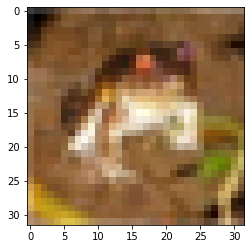

In [12]:
plt.imshow(X_train[0])

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

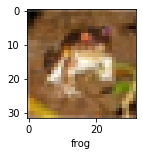

In [14]:
plot_sample(X_train, y_train, 0)

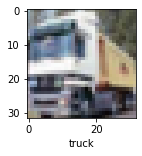

In [15]:
plot_sample(X_train, y_train, 1)

Normalizing the training data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification


In [17]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.9339 - accuracy: 0.3040
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6384 - accuracy: 0.4226
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5485 - accuracy: 0.4539
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4827 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4378 - accuracy: 0.4932


In [31]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.68      0.53      1000
           1       0.48      0.77      0.59      1000
           2       0.42      0.31      0.35      1000
           3       0.39      0.26      0.31      1000
           4       0.47      0.33      0.39      1000
           5       0.51      0.25      0.33      1000
           6       0.51      0.58      0.54      1000
           7       0.46      0.64      0.54      1000
           8       0.68      0.54      0.60      1000
           9       0.53      0.48      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



Now let us build a convolutional neural network to train our images

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [21]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.7340 - accuracy: 0.37 - 48s 31ms/step - loss: 1.7335 - accuracy: 0.3702
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1385 - accuracy: 0.59600s - loss: 1.1387 - accuracy: 
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9965 - accuracy: 0.6510
Epoch 4/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.9241 - accuracy: 0.67930s - loss:
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8585 - accuracy: 0.7019
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8019 - accuracy: 0.7224
Epoch 7/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7508 - accuracy: 0.7400
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7066 - accuracy: 0.7543
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6670 -

In [34]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.86      0.76      0.80      1000
           2       0.51      0.64      0.57      1000
           3       0.56      0.44      0.49      1000
           4       0.58      0.68      0.63      1000
           5       0.63      0.57      0.60      1000
           6       0.83      0.69      0.75      1000
           7       0.78      0.71      0.74      1000
           8       0.71      0.86      0.78      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. 

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.9426 - accuracy: 0.6845


[0.9425716996192932, 0.684499979019165]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.6950484e-03, 3.0394929e-04, 4.7741951e-03, 9.3793714e-01,
        2.0663258e-04, 2.3420736e-02, 1.1627896e-02, 5.8227697e-06,
        1.7752308e-02, 2.7616709e-04],
       [1.7765311e-04, 2.0226290e-02, 6.9704932e-08, 2.1541215e-08,
        2.1292151e-07, 2.4232491e-10, 9.9336104e-09, 8.2790823e-09,
        9.7596496e-01, 3.6307983e-03],
       [8.2576498e-02, 5.3416193e-02, 2.2542839e-04, 2.6912056e-03,
        1.7444143e-04, 9.2407514e-05, 2.1429718e-05, 6.0950500e-05,
        8.4747547e-01, 1.3265909e-02],
       [8.8062710e-01, 1.3703664e-02, 1.9652188e-02, 3.8614843e-04,
        1.2624810e-03, 7.6014294e-06, 2.0028293e-04, 2.5541747e-05,
        8.4126897e-02, 8.3352988e-06],
       [5.1752745e-06, 3.5071982e-05, 2.3708697e-02, 1.6461998e-02,
        5.3228009e-01, 1.6332200e-03, 4.2586914e-01, 2.4794888e-06,
        4.1334770e-06, 8.2816740e-08]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

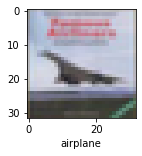

In [27]:
plot_sample(X_test, y_test,3)

In [36]:
classes[y_classes[3]]

'airplane'